In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import natsort

# download csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
data = pd.read_csv('data/130001_tokyo_covid19_patients.csv', parse_dates = ['公表_年月日', '発症_年月日', '確定_年月日'], low_memory=False)

In [122]:
daily_data = data[(data['公表_年月日'] >= '2020-09-01') & (data['公表_年月日'] < '2021-09-01')]

pivot_df = pd.pivot_table(daily_data, index='公表_年月日', columns='患者_年代', values='全国地方公共団体コード', margins=True, aggfunc=len, dropna=False)

pivot_df = pivot_df.reindex(columns=['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代','80代', '90代', '100歳以上', 'All'])

pivot_df = pivot_df.drop('All', axis=0)

daily_all = pivot_df['All']

pivot_df = pivot_df.loc[:, '10歳未満': '100歳以上'].div(pivot_df["All"], axis=0)
pivot_df['All'] = daily_all


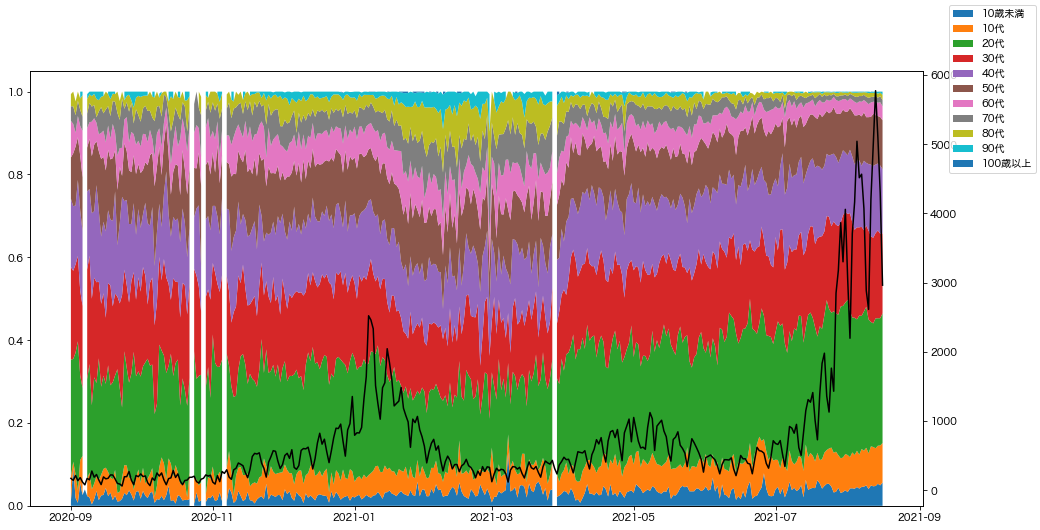

In [123]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.stackplot(pivot_df.index, pivot_df.drop('All', axis=1).T, labels=['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代','80代', '90代', '100歳以上'])
ax2.plot(pivot_df['All'], color='k')

fig.legend()
